# Data Exploration

In [1]:
# import libraries
# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction


# load train and test data
train = pd.read_csv("train.csv", index_col = 'PassengerId')
label = train['Survived']
test = pd.read_csv("test.csv", index_col = 'PassengerId')
index = test.index

train.head()

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


SURVIVED

survived is the target variable for this dataset so let us analyse on this field first.

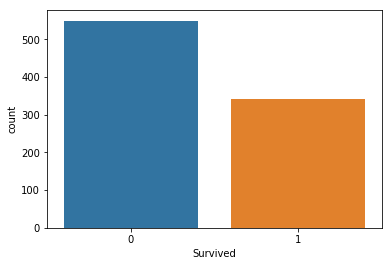

In [3]:
sns.countplot(label)

More than half of the passengers died.



MALE AND FEMALE

Text(0.5,1,'Survived passenger under age 21')

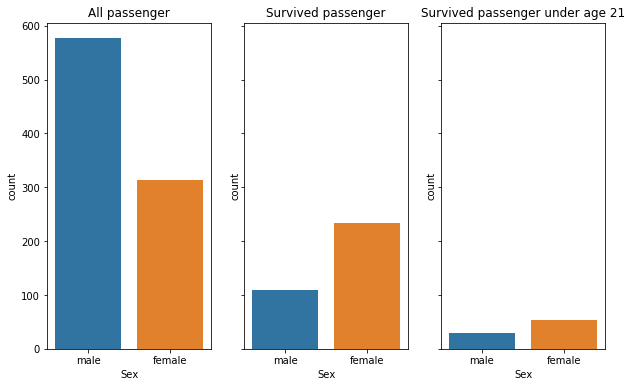

In [4]:
fig, ax =plt.subplots(1,3 , figsize=(10, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Sex' , data=train , ax = ax[0] , order=['male' , 'female'])
b = sns.countplot(x = 'Sex' , data= train[label == 1] , ax = ax[1] , order=['male' , 'female'])
c = sns.countplot(x = 'Sex' , data= train[ ((train['Age'] < 21) & (label == 1)) ] , order=['male' , 'female'])
ax[0].set_title('All passenger')
ax[1].set_title('Survived passenger')
ax[2].set_title('Survived passenger under age 21')

Majority of passengers were male.
Most of the female passengers survived but males didn't.


PASSENGER CLASS

Text(0.5,1,'Survived passanger under age 21')

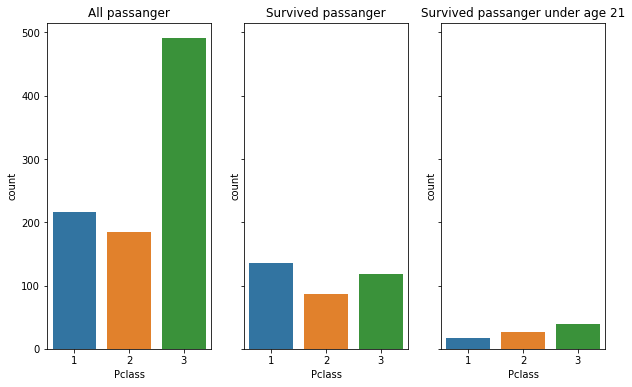

In [5]:
fig, ax =plt.subplots(1,3 , figsize=(10, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Pclass' , data=train , ax = ax[0] , order=[1 ,2,3])
b = sns.countplot(x = 'Pclass' , data= train[label == 1] , ax = ax[1] , order=[1 ,2,3])
c = sns.countplot(x = 'Pclass' , data= train[ ((train['Age'] < 21) & (label == 1)) ] , order=[1,2,3])
ax[0].set_title('All passanger')
ax[1].set_title('Survived passanger')
ax[2].set_title('Survived passanger under age 21')

Majority of the passengers travelled in the 3rd class and they died. Poor people travelled in class 3.

Most poor people who survived were under the age of 21.

Majority of people travelling in 1st class survived which means they were given preference to other classes during rescue mission.


EMBARKED

Text(0.5,1,'Survived passanger under age 21')

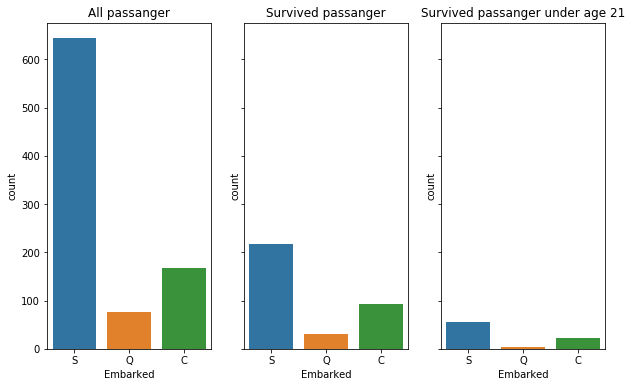

In [6]:
fig, ax = plt.subplots(1,3 , figsize=(10, 6) , sharex='col', sharey='row')
a = sns.countplot(x = 'Embarked' , data=train , ax = ax[0] , order=['S' ,'Q','C'])
b = sns.countplot(x = 'Embarked' , data= train[label == 1] , ax = ax[1] , order=['S' ,'Q','C'])
c = sns.countplot(x = 'Embarked' , data= train[ ((train['Age'] < 21) & (label == 1)) ] , order=['S' ,'Q','C'])
ax[0].set_title('All passanger')
ax[1].set_title('Survived passanger')
ax[2].set_title('Survived passanger under age 21')

Most passengers boarded from Southamptom (starting point of journey) and they died.

# Feature Engineering

DECK

The first letter of Cabin name gives information about the part of a ship a particular passenger might be.

In [7]:
train['Deck'] = train.Cabin.str.get(0)
test['Deck'] = test.Cabin.str.get(0)
train['Deck'] = train['Deck'].fillna('NOTAVL')
test['Deck'] = test['Deck'].fillna('NOTAVL')
train.Deck.replace('T' , 'G' , inplace = True)
train.drop('Cabin' , axis = 1 , inplace =True)
test.drop('Cabin' , axis = 1 , inplace =True)

# missing values in train data
train.isna().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Deck          0
dtype: int64

In [8]:
#missing values in test data
test.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
Deck         0
dtype: int64

In training set there is missing value in Embarked and Age
In training set there is missing value in Fare and Age

Fill the missing values

In [9]:
train.loc[train.Embarked.isna(), 'Embarked'] = 'S'

In the above bar graph we saw that Pclass, sex, Embarked were the determing factor for the servival of a passenger we will group them using these features and fill the median age in the corresponding missing values in the group

In [10]:
age_to_fill = train.groupby(['Pclass' , 'Sex' , 'Embarked'])[['Age']].median()
age_to_fill

Age
Pclass Sex    Embarked       
1      female C         37.00
              Q         33.00
              S         34.00
       male   C         36.50
              Q         44.00
              S         42.00
2      female C         22.00
              Q         30.00
              S         29.00
       male   C         29.50
              Q         57.00
              S         30.00
3      female C         14.25
              Q         20.00
              S         23.00
       male   C         26.00
              Q         27.00
              S         25.00

In [11]:
for cl in range(1,4):
    for sex in ['male' , 'female']:
        for E in ['C' , 'Q' , 'S']:
            filll = pd.to_numeric(age_to_fill.xs(cl).xs(sex).xs(E).Age)
            train.loc[(train.Age.isna() & (train.Pclass == cl) & (train.Sex == sex) 
                    &(train.Embarked == E)) , 'Age'] =filll
            test.loc[(test.Age.isna() & (test.Pclass == cl) & (test.Sex == sex) 
                    &(test.Embarked == E)) , 'Age'] =filll

In [12]:
# There shouldn't be any difference between the previous median of groups and after filling its median in place of NaN
train.groupby(['Pclass' , 'Sex' , 'Embarked'])[['Age']].median()

Age
Pclass Sex    Embarked       
1      female C         37.00
              Q         33.00
              S         34.00
       male   C         36.50
              Q         44.00
              S         42.00
2      female C         22.00
              Q         30.00
              S         29.00
       male   C         29.50
              Q         57.00
              S         30.00
3      female C         14.25
              Q         20.00
              S         23.00
       male   C         26.00
              Q         27.00
              S         25.00

Good news! There's no difference.

Fare is string with number at the end, Two consecutive ticket number means they are bought from same place or they got same deck on the ship.

In [13]:
train.Ticket = pd.to_numeric(train.Ticket.str.split().str[-1] , errors='coerce')
test.Ticket = pd.to_numeric(test.Ticket.str.split().str[-1] , errors='coerce')

In [14]:
# We fill the missing Ticket value in train data with median Ticket value and one missing fare value in test data with median fare in train
Ticket_median = train.Ticket.median()
train.Ticket.fillna(Ticket_median , inplace =True)
test.Fare.fillna(train.Fare.median() , inplace =True)

train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [15]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

Lets create one feature variable Status in the society. This feature can be derived from the name features like 'Dr' , 'Rev' , 'Col' , 'Major' etc

In [16]:
train['Status'] = train['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
test['Status'] = test['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
importan_person = ['Dr' , 'Rev' , 'Col' , 'Major' , 'Mlle' , 'Don' , 'Sir' , 'Ms' , 'Capt' , 'Lady' , 'Mme' , 'the Countess' , 'Jonkheer' , 'Dona'] 
for person in importan_person:
    train.Status.replace(person, 'IMP' , inplace =True)
    test.Status.replace(person, 'IMP' , inplace =True)
train.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'IMP'], dtype=object)

In [17]:
train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch     Ticket     Fare Embarked    Deck Status  
PassengerId                                                            
1                1      0    21171.0   7.2500        S  NOTAVL     Mr  
2                1      0    17599.0  71.2833        C       C    Mrs  
3                0      0  3101282.0   7.9250        S  NOTAVL   Miss  
4                1      0   113803.0  53.1000        S       C    Mrs  
5                0      0   373450.0   8.0500        S  NOTAVL     Mr

In [18]:
test.head()

Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Embarked    Deck Status  
PassengerId                                                                
892          34.5      0      0   330911   7.8292        Q  NOTAVL     Mr  
893          47.0      1      0   363272   7.0000        S  NOTAVL    Mrs  
894          62.0      0      0   240276   9.6875        Q  NOTAVL     Mr  
895          27.0      0      0   315154   8.6625        S  NOTAVL     Mr  
896          22.0      1      1  3101298  12.2875        S  NOTAVL    Mrs

In [19]:
test.drop(['Name' , 'Ticket' ] ,axis = 1, inplace = True)
train.drop(['Survived','Ticket' ,'Name' ], inplace =True , axis =1)
cat_col = ['Pclass' , 'Sex' , 'Embarked' , 'Status' , 'Deck']
train.Pclass.replace({
    1 :'A' , 2:'B' , 3:'C'
} , inplace =True)
test.Pclass.replace({
    1 :'A' , 2:'B' , 3:'C'
} , inplace =True)
train = pd.get_dummies(train , columns=cat_col)
test = pd.get_dummies(test , columns=cat_col)
print(train.shape , test.shape)

(891, 25) (418, 25)


In [20]:
# scaling the data 

scaler = MinMaxScaler()

train= scaler.fit_transform(train)
test = scaler.transform(test)

# Machine Learning

In [28]:
model = RandomForestClassifier(bootstrap= True , min_samples_leaf= 3, n_estimators = 500 ,
                               min_samples_split = 10, max_features = "sqrt", max_depth= 6)
kfold = KFold(n_splits=10, random_state=22)
result_rm = cross_val_score(model , train , label , cv=5)
print('Cross validated score of Random Forest is:',round(result_rm.mean()*100,2))

Cross validated score of Random Forest is: 82.5


In [29]:
model = LogisticRegression()
kfold = KFold(n_splits=10, random_state=22)
result_rm = cross_val_score(model , train , label , cv=5)
print('Cross validated score of logistic regression is:',round(result_rm.mean()*100,2))

Cross validated score of logistic regression is: 82.72


In [30]:
model = SVC(C=4)
kfold = KFold(n_splits=10, random_state=22)
result_rm = cross_val_score(model , train , label , cv=5)
print('Cross validated score of Support Vector Classifier is:',round(result_rm.mean()*100,2))

Cross validated score of Support Vector Classifier is: 82.5


In [31]:
model.fit(train , label)
pre = model.predict(test)
ans = pd.DataFrame({'PassengerId' : index , 'Survived': pre})
ans.to_csv('submit.csv', index = False)
ans.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0